In [2]:
import pandas as pd
import shap
import matplotlib.pyplot as plt
import numpy as np

/Users/pascalcsukovits/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df = pd.read_csv('data/finance_stocks/finance_stocks-train.csv', nrows=100)

df.head()

timestamp  \
0  2023-11-15T09:36:42.028000+00:00   
1  2023-11-15T06:01:59.788000+00:00   
2  2023-11-15T06:01:55.590000+00:00   
3  2023-11-15T06:01:51.329000+00:00   
4  2023-11-15T04:01:49.009000+00:00   

                                          tweet_text  \
0  $GOLD's Massive Range.\n\nIn the past ~year we...   
1  RT @SmartReversals: $SPX - Daily Chart:\n\n✅Ta...   
2  RT @SmartReversals: $NDX - Daily Chart:\n\n✅Ta...   
3  RT @SmartReversals: $IWM - Daily Chart:\n\n✅Ta...   
4  RT @coiledspringcap: Everyone has been concern...   

                                           tweet_url tweet_type  \
0  https://twitter.com/user/status/17247221551437...      tweet   
1  https://twitter.com/user/status/17246687922221...    retweet   
2  https://twitter.com/user/status/17246687824535...    retweet   
3  https://twitter.com/user/status/17246687591081...    retweet   
4  https://twitter.com/user/status/17246376898767...    retweet   

  price_of_ticker change_of_ticker tickers_mentioned      category  
0       ['15.71']       ['+3.69%']         ['$GOLD']  stock_images  
1     ['4495.71']       ['+1.87%']          ['$SPX']  stock_images  
2   ['15812.473']       ['+2.08%']          ['$NDX']  stock_images  
3      ['178.46']       ['+5.21%']          ['$IWM']  stock_images  
4     ['4495.71']       ['+1.87%']          ['$SPX']  stock_images

In [4]:
from transformers import pipeline

/Users/pascalcsukovits/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [5]:
pipe = pipeline("text-classification", model="mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis")


In [6]:
df

timestamp  \
0   2023-11-15T09:36:42.028000+00:00   
1   2023-11-15T06:01:59.788000+00:00   
2   2023-11-15T06:01:55.590000+00:00   
3   2023-11-15T06:01:51.329000+00:00   
4   2023-11-15T04:01:49.009000+00:00   
..                               ...   
95  2023-11-10T03:43:08.858000+00:00   
96  2023-11-10T01:38:08.541000+00:00   
97  2023-11-10T00:33:17.973000+00:00   
98  2023-11-10T00:33:08.171000+00:00   
99  2023-11-10T00:23:08.485000+00:00   

                                           tweet_text  \
0   $GOLD's Massive Range.\n\nIn the past ~year we...   
1   RT @SmartReversals: $SPX - Daily Chart:\n\n✅Ta...   
2   RT @SmartReversals: $NDX - Daily Chart:\n\n✅Ta...   
3   RT @SmartReversals: $IWM - Daily Chart:\n\n✅Ta...   
4   RT @coiledspringcap: Everyone has been concern...   
..                                                ...   
95                         RT @FusionptCapital: $NVDA   
96  $GRI Saw a nice 25% move today, pulled back qu...   
97  1 positive Sector on the week so far. \n\nAnd ...   
98  $DIS - This bottom catch making up for being e...   
99  $OPTI gang 🤝\n\n> [@EricCryptoman](https://twi...   

                                            tweet_url   tweet_type  \
0   https://twitter.com/user/status/17247221551437...        tweet   
1   https://twitter.com/user/status/17246687922221...      retweet   
2   https://twitter.com/user/status/17246687824535...      retweet   
3   https://twitter.com/user/status/17246687591081...      retweet   
4   https://twitter.com/user/status/17246376898767...      retweet   
..                                                ...          ...   
95  https://twitter.com/user/status/17228215004899...      retweet   
96  https://twitter.com/user/status/17227895247685...  quote tweet   
97  https://twitter.com/user/status/17227736596752...        tweet   
98  https://twitter.com/user/status/17227735242330...        tweet   
99  https://twitter.com/user/status/17227715102579...  quote tweet   

                   price_of_ticker                change_of_ticker  \
0                        ['15.71']                      ['+3.69%']   
1                      ['4495.71']                      ['+1.87%']   
2                    ['15812.473']                      ['+2.08%']   
3                       ['178.46']                      ['+5.21%']   
4                      ['4495.71']                      ['+1.87%']   
..                             ...                             ...   
95                       ['469.5']                       ['+0.8%']   
96                        ['1.27']                      ['+3.15%']   
97  ['174.95', '370.07', '433.84']  ['-0.47%', '-0.78%', '-0.79%']   
98                       ['90.34']                      ['+6.46%']   
99                      ['0.0004']                         ['N/A']   

           tickers_mentioned      category  
0                  ['$GOLD']  stock_images  
1                   ['$SPX']  stock_images  
2                   ['$NDX']  stock_images  
3                   ['$IWM']  stock_images  
4                   ['$SPX']  stock_images  
..                       ...           ...  
95                 ['$NVDA']  stock_images  
96                  ['$GRI']  stock_images  
97  ['$XLK', '$QQQ', '$SPY']  stock_images  
98                  ['$DIS']  stock_images  
99                 ['$OPTI']  stock_images  

[100 rows x 8 columns]

In [7]:
predictions = [pipe(text)[0]['label'] for text in df["tweet_text"]]
df['Sentiment'] = predictions

In [8]:
shap_df = df[['tweet_text', 'Sentiment']]
shap_df

tweet_text Sentiment
0   $GOLD's Massive Range.\n\nIn the past ~year we...  positive
1   RT @SmartReversals: $SPX - Daily Chart:\n\n✅Ta...   neutral
2   RT @SmartReversals: $NDX - Daily Chart:\n\n✅Ta...   neutral
3   RT @SmartReversals: $IWM - Daily Chart:\n\n✅Ta...   neutral
4   RT @coiledspringcap: Everyone has been concern...  negative
..                                                ...       ...
95                         RT @FusionptCapital: $NVDA   neutral
96  $GRI Saw a nice 25% move today, pulled back qu...  positive
97  1 positive Sector on the week so far. \n\nAnd ...  positive
98  $DIS - This bottom catch making up for being e...   neutral
99  $OPTI gang 🤝\n\n> [@EricCryptoman](https://twi...  positive

[100 rows x 2 columns]

In [9]:
explainer = shap.Explainer(pipe)
shap_values = explainer(shap_df["tweet_text"])

PartitionExplainer explainer: 101it [15:55,  9.56s/it]                         


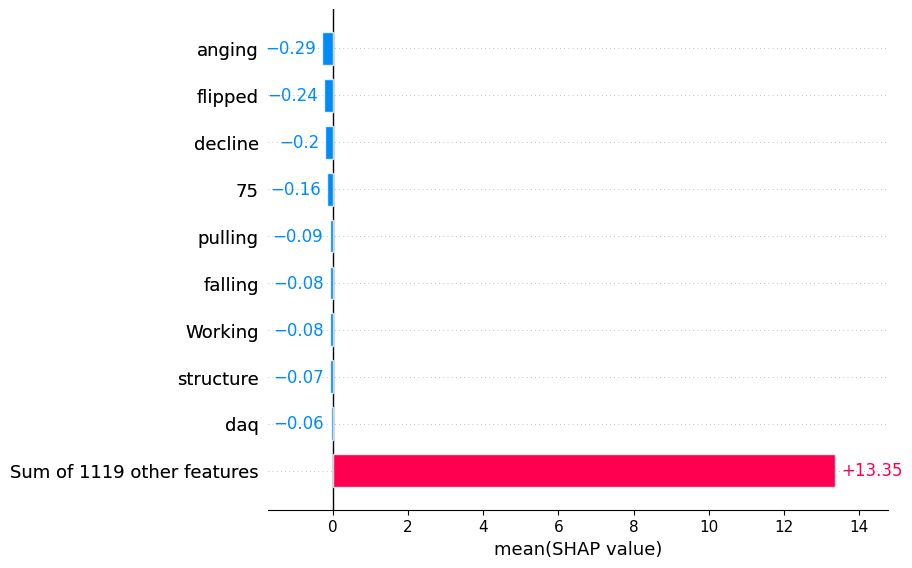

In [12]:
shap.plots.bar(shap_values[:, :, "positive"].mean(0), order=shap.Explanation.argsort)

In [11]:
shap.plots.text(shap_values[:, :, "positive"])